# DSCI 100 Group Project Report - Group 17

## Introduction

Introduction:
* provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
* clearly state the question you tried to answer with your project
* identify and describe the dataset that was used to answer the question



Audits are the process of carefully examining financial records of businesses. They are conducted to make sure that organizations accurately report its financial transactions in a way that complies with local laws and standards. There are many times when a business may require an audit. For example, some common times when audits are required are when a business is trying to raise capital, bring on new investors, or sell the business (Godick, 2022). Audits are also often performed when an agency wants to determine if the taxes being paid by the business are correct (Keng, 2018). 

Every audit must be unique to the business that the audit is being conducted on; therefore, there is a large time requirement for a single thorough audit to be conducted. There are many phases to an audit, the first of which is almost always to gather information about the audited business and plan out the audit (Godick, 2022). The business's records will be reviewed with the consideration of the details about the individual business that were gathered while planning for the audit. The final audit must also be reviewed many times to ensure that a fair evaluation of the business was performed as results may determine the reputation and future of a business (Ashar, 2022). The many phases, careful consideration, and review all add up to make the process of conducting an audit often take a very long time to complete. In fact, there is usually no time limit set on audits to make sure that every evaluation is conducted to as accurately as possible, and many audits can be very time consuming to complete (Ashar, 2022). 

Internal audits are conducted by auditors within the organization they are performing the audit. The results are generally used to make improvements and identify issues within the company. External audits are conducted by third-party auditing firms; the results are used to find any misstatements, errors, or fraud within the company. External audits are always conducted by third-parties to remove any bias (Keng, 2018). Auditing firms have a very important responsibility in catching fraud cases. Firms performing audits must carefully examine the financial records of businesses to ensure that they are following accounting laws. To properly perform audits, auditors must go through financial records such as receipts, balance sheets, etc. This is a lot of data to analyze. 

When reviewing the records of any business, the context to any numbers are said to be important in making any accurate reviews (Keng, 2018). However what if we remove the all context and only consider the numbers in the financial records that we are presented? How accurately can we predict if a business is committing fraud if we automate the process? An automated process would be able to save a lot of time and money for both auditing firms and the businesses requiring audits. 

The question we want to answer is: Can fruadulent firms can be correctly predicted using with certain risk factors and a k-nearest neighbours classification (knn) approach?

The dataset sourced from Hooda et al. (2018) shows annual audit data from 777 firms across 14 different sectors. There are 17 columns of observations in the dataset, the risk class column shows whether the case is fraudulent or not. 

### Variable Information

| | Inherent Risk Factors | | Control Risk Factors |
| --- | --- | ---| --- |
| ParaA | Discrepancy in planned-expenditure of inspection and summary report A in Rs | Sector score | Historical risk score value of the target-unit |
| ParaB | Discrepancy in unplanned-expenditure of inspection and summary report B in Rs | Loss | Amount of loss suffered by the firm last year. |
| Total | Total amount of discrepancy found in other reports Rs | History | Average historical loss suffered by firm in the last 10 years. |
| Number | Historical discrepancy score. | District score | Historical risk score of a district in the last 10 years. |
| Money Value | Amount of money involved in misstatements in the past audits. | | |
| Sector ID | Unique ID of the target sector. | Location ID | Unique ID of the city/province. |
| ARS | Total risk score using analytical procedure. | Audit ID | Unique Id assigned to an audit case. |
| Risk class | Risk Class assigned to an audit-case, 1=fraud or 0=no fraud (Target Feature) 

## Methods and Results

Methods & Results:
* describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis. 
* Your report should include code which:
    * loads data from the original source on the web
    * wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    * performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    * creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    * performs the data analysis
    * creates a visualization of the analysis 
    * note: all tables and figure should have a figure/table number and a legend
    




In [1]:
# open packages
library(tidyverse)
library(tidymodels)
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Import the data from the url. The data set has 18 columns. We remove the "location_id" column since it's not useful for our analysis. 

In [2]:
# import the data set, make column names consistent
url <- "https://raw.githubusercontent.com/hakkd/dsci-100-project-group17/main/trial.csv"

column_names = c("sector_score", "location_id", "para_a", "score_a", "para_b", "score_b", 
             "total", "numbers", "marks", "money_value", "money_marks", "district", "loss", 
             "loss_score", "history", "history_score", "score", "risk")

audit_data <- read_csv(url, col_names = column_names, skip = 1)

# dropping location_id column (not useful)
audit_data <- select(audit_data, -location_id)

head(audit_data)

Rows: 776 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): location_id
dbl (17): sector_score, para_a, score_a, para_b, score_b, total, numbers, ma...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sector_score,para_a,score_a,para_b,score_b,total,numbers,marks,money_value,money_marks,district,loss,loss_score,history,history_score,score,risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,4.18,6,2.50,2,6.68,5,2,3.38,2,2,0,2,0,2,2.4,1
3.89,0.00,2,4.83,2,4.83,5,2,0.94,2,2,0,2,0,2,2.0,0
3.89,0.51,2,0.23,2,0.74,5,2,0.00,2,2,0,2,0,2,2.0,0
3.89,0.00,2,10.80,6,10.80,6,6,11.75,6,2,0,2,0,2,4.4,1
3.89,0.00,2,0.08,2,0.08,5,2,0.00,2,2,0,2,0,2,2.0,0
3.89,0.00,2,0.83,2,0.83,5,2,2.95,2,2,0,2,0,2,2.0,0


**Table 1.** First 6 rows of the audit data set with variable names and data types shown.

Since we want to classify firms by fraud risk, we change the risk column to a factor and recode the values as F = Fraudulent and N = Not Fraudulent for clarity. 

In [3]:
# change Risk to factor and recode as F (fraud) or N (no fraud)
audit_data$risk <- ifelse(audit_data$risk == "1", "F", "N")

audit_data <- audit_data |>
        mutate(risk = as.factor(risk))


We split the data set into training and testing sets, using 75% of the data for training.

In [4]:
set.seed(4321) #set seed

# creating training and testing datasets
audit_split <- initial_split(audit_data, prop = 0.75, strata = risk)

audit_train <- training(audit_split)
audit_test <- testing(audit_split)

Next we check the proportions of fraudulent and not fraudulent firms in the training set.

In [5]:
# check proportion of fraudulent and not fraudulent cases
audit_proportions <- audit_train |>
                      group_by(risk) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(audit_train))

audit_proportions

risk,n,percent
<fct>,<int>,<dbl>
F,364,62.6506
N,217,37.3494


**Table 2.** Proportion of fraudulent and not fraudulent firms in the training set. Approximately 60% of the firms are labelled as fraudulent.

Next we check if there are any NA values in the training set.

In [6]:
# check how many NA values are in each column (if any)
audit_train |>
    map_df(is.na) |>
    map_df(sum)

sector_score,para_a,score_a,para_b,score_b,total,numbers,marks,money_value,money_marks,district,loss,loss_score,history,history_score,score,risk
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


**Table 3.** There is one column in the training set with a single NA value (money_value). This should be considered for analysis using the money_value variable.

Since there is only a single row in the training data containing an NA value, we will drop the row from the data set.

In [7]:
# drop row containing NA value
audit_train <- audit_train |> drop_na()

# show mean of all columns grouped by risk
audit_train |> 
    group_by(risk) |>
    summarize_all(mean, na.rm = TRUE)

risk,sector_score,para_a,score_a,para_b,score_b,total,numbers,marks,money_value,money_marks,district,loss,loss_score,history,history_score,score
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F,12.92104,3.7398918,4.472527,14.7006868,3.725275,18.3729962,5.105769,2.39011,26.5967308,3.538462,2.78022,0.0467033,2.098901,0.1785714,2.28022,3.112637
N,32.16449,0.2915741,2.000000,0.2611907,2.000000,0.5527648,5.000000,2.00000,0.2960046,2.000000,2.00000,0.0000000,2.000000,0.0000000,2.00000,2.000000


**Table 4.** Means of all variables for fraudulent and not fraudulent firms.

From table 4 we see that there are large differences in the means for the "total" and "money_value" variables between the two fraud classes, suggesting that these variables may make good predictors for our knn-classification model. 

We visualize the distributions of selected variables in the training set to identify possible predictors. We use density plots to do the distribution, with separate colours/distributions for each of the risk types to show the differences between fraudulent and non-fraudulent firms.

Warning message:
“Removed 94 rows containing non-finite values (stat_density).”
Warning message:
“Removed 79 rows containing non-finite values (stat_density).”


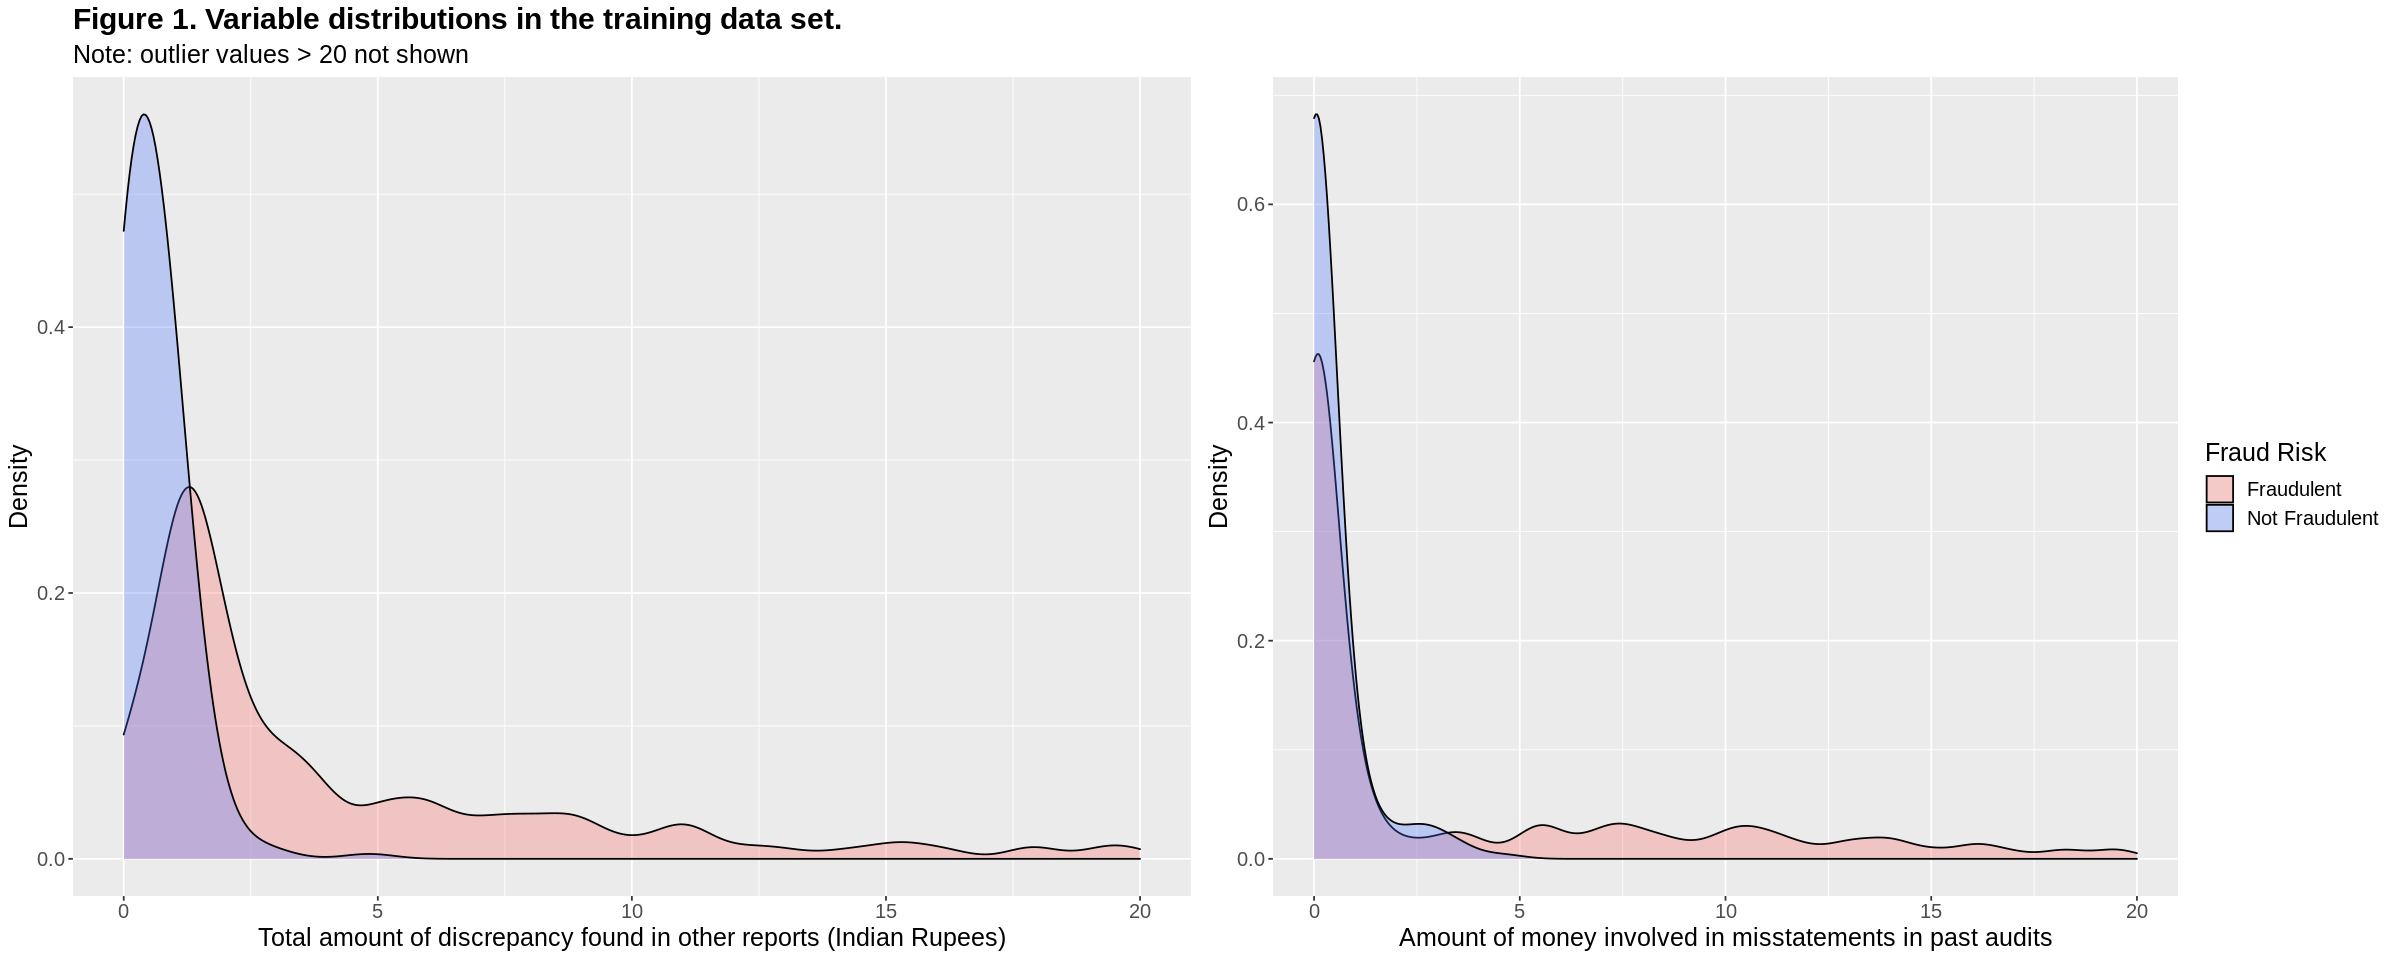

In [28]:
# select columns for further analysis
audit_train_select <- audit_train |> select(total, money_value, risk)

# set plot size
options(repr.plot.width = 20, repr.plot.height = 8)

total_plot <- ggplot(audit_train_select, aes(x = total, fill = risk)) +
    geom_density(alpha = 0.3, bw = 0.5) +
    xlim(0, 20) +
    #ylim(0, 200) +
    labs(x = "Total amount of discrepancy found in other reports (Indian Rupees)", 
         y = "Density") +
    scale_fill_manual(labels = c("Fraudulent", "Not Fraudulent"),
                     values = c("indianred1", "royalblue1")) +
    ggtitle("Figure 1. Variable distributions in the training data set.",
           subtitle = "Note: outlier values > 20 not shown")+
    theme(legend.position = "none", 
          plot.title = element_text(face = "bold", size = 18),
         text = element_text(size = 15))

money_val_plot <- ggplot(audit_train_select, aes(x = money_value, fill = risk)) +
    geom_density(alpha = 0.3, bw = 0.5) +
    xlim(0, 20) +
    # ylim(0, 0.5) +
    labs(x = "Amount of money involved in misstatements in past audits",
         y = "Density",
        fill = "Fraud Risk") +
    scale_fill_manual(labels = c("Fraudulent", "Not Fraudulent"),
                     values = c("indianred1", "royalblue1")) +
    ggtitle(" ", subtitle = " ") +
    theme(text = element_text(size = 15))

grid.arrange(total_plot, money_val_plot, 
             ncol = 2)

From Figure 1 we see that the variables "total" and "money_value" are continuous and skewed to the right. These distributions suggest that the majority of firms have low discrepancy in reporting and low amounts of money involved in misstatements in past audits. We can also see that higher values of these two variables are associated with fraudulent firms in the training data set. Thus, these variables should make good predictors for our fraud classification model.

For building the knn-classification model, we perform a 5-fold cross validation with 1-20 neighbors using the training data. We standardize the data to ensure that the predictor variables in our classifier have equal importance.

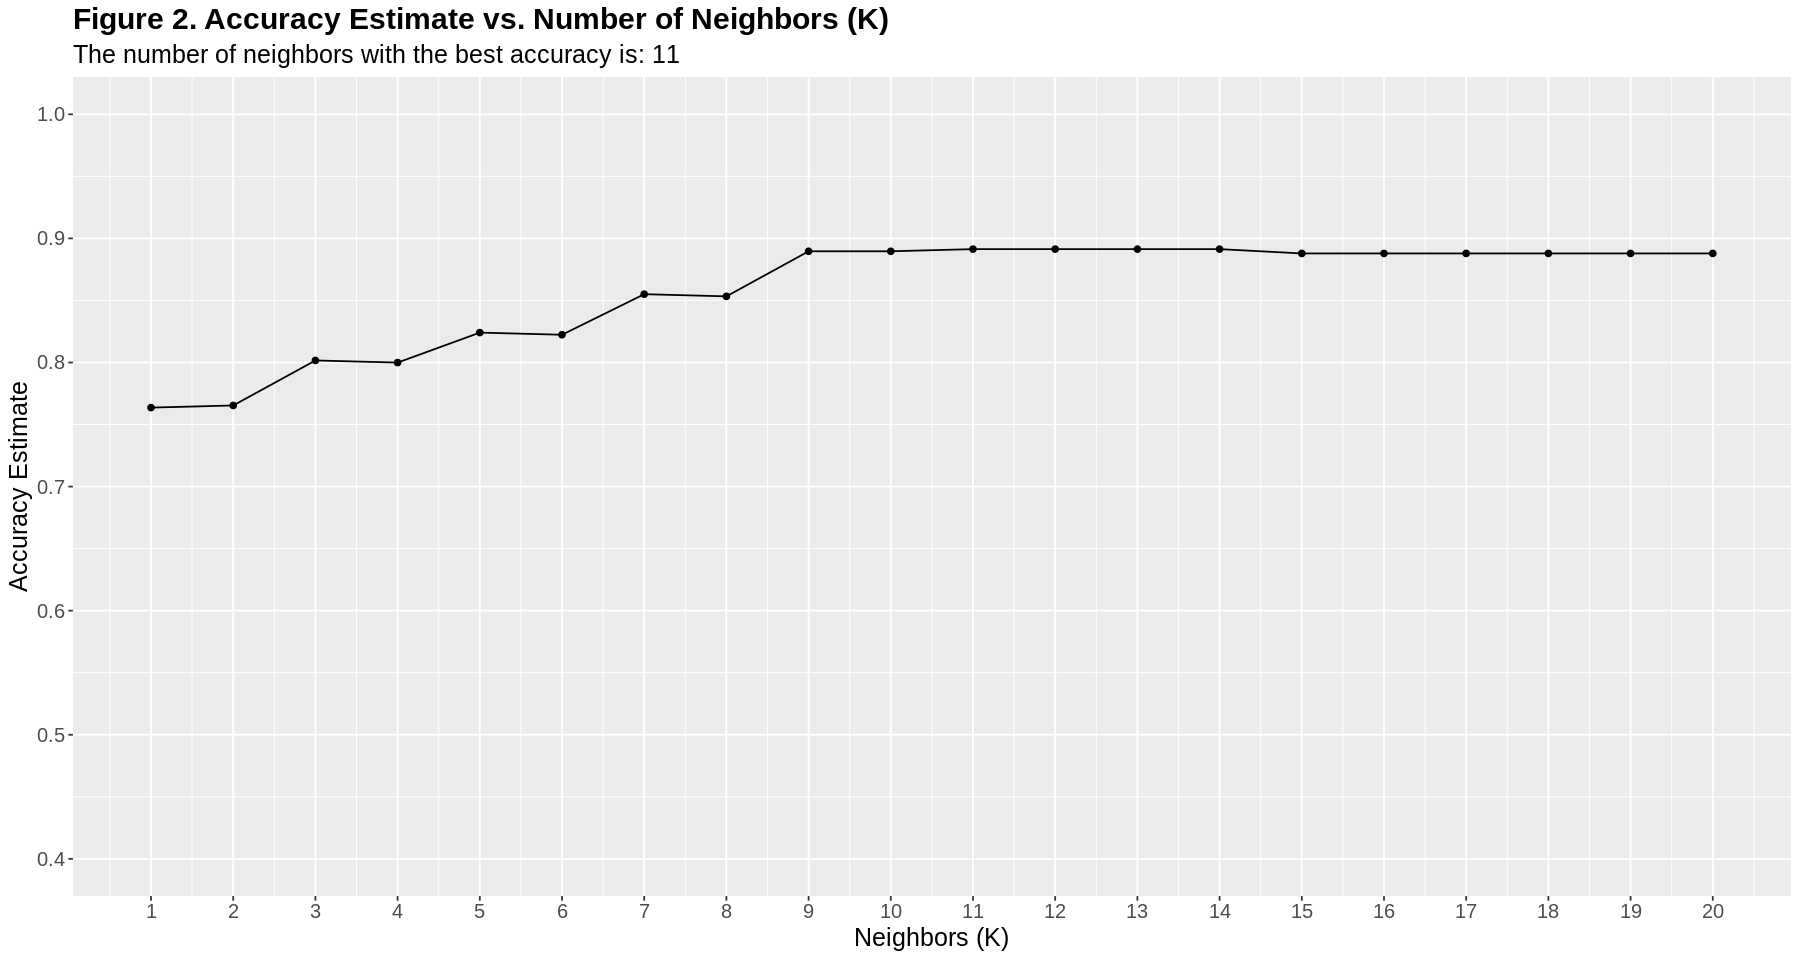

In [9]:
# finding the best k value for k-nn classification
set.seed(4321)

# cross validation with 5 folds
audit_vfold <- vfold_cv(audit_train_select, v = 5, strata = risk)

# recipe
audit_recipe <- recipe(risk ~ total + money_value, data = audit_train_select) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# k-nn tuning
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

ks <- tibble(neighbors = seq(1, 20))

# workflow
training_results <- workflow() %>%
    add_recipe(audit_recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = audit_vfold, grid = ks) %>%
    collect_metrics()

accuracy <- filter(training_results, .metric == "accuracy")

best_k <- accuracy %>%
    arrange(desc(mean)) %>%
    select(neighbors) %>%
    slice(1)

best_k_text <- paste("The number of neighbors with the best accuracy is:", best_k[1])

# plotting results 
cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors (K)", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 20, by = 1)) +  # adjusting the x-axis
    scale_y_continuous(breaks = seq(0, 1, by = 0.1), limits = c(0.4, 1.0)) # adjusting the y-axis

cross_val_plot + 
    ggtitle("Figure 2. Accuracy Estimate vs. Number of Neighbors (K)",
           subtitle = best_k_text) +
    theme(text = element_text(size = 15), plot.title = element_text(face = "bold"))

Figure 2 shows that accuracy generally increases with increasing K for K < 10, after which there is a plateau. We identified K = 11 to produce the greatest accuracy with the training data.

Finally, we apply the knn-classication model with K = 11 to the test data and output the result table, accuracy, and confusion matrix. 

In [10]:
# Building the model with the best k
set.seed(4321)

best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
    set_engine("kknn") %>%
    set_mode("classification")

best_audit_fit <- workflow() %>%
    add_recipe(audit_recipe) %>%
    add_model(best_spec) %>%
    fit(data = audit_train)

# applying model to testing data
audit_predictions <- predict(best_audit_fit, audit_test) %>%
    bind_cols(audit_test)
head(audit_predictions)

.pred_class,sector_score,para_a,score_a,para_b,score_b,total,numbers,marks,money_value,money_marks,district,loss,loss_score,history,history_score,score,risk
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
N,3.89,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,N
F,3.89,5.43,6,10.77,6,16.20,5.0,2,4.42,2,2,0,2,0,2,3.6,F
F,3.89,8.54,6,31.63,6,40.17,5.0,2,41.28,6,2,0,2,1,4,4.2,F
F,3.89,1.81,4,1.03,2,2.84,5.0,2,0.00,2,2,0,2,0,2,2.2,F
F,3.89,4.86,6,46.78,6,51.64,5.5,4,63.18,6,2,0,2,0,2,4.4,F
F,3.89,7.42,6,2.24,2,9.66,5.0,2,1.25,2,2,0,2,0,2,2.4,F


**Table 5.** Select rows from knn-classification result for testing data. ".pred_class" indicates the prediction applied to each data point. 

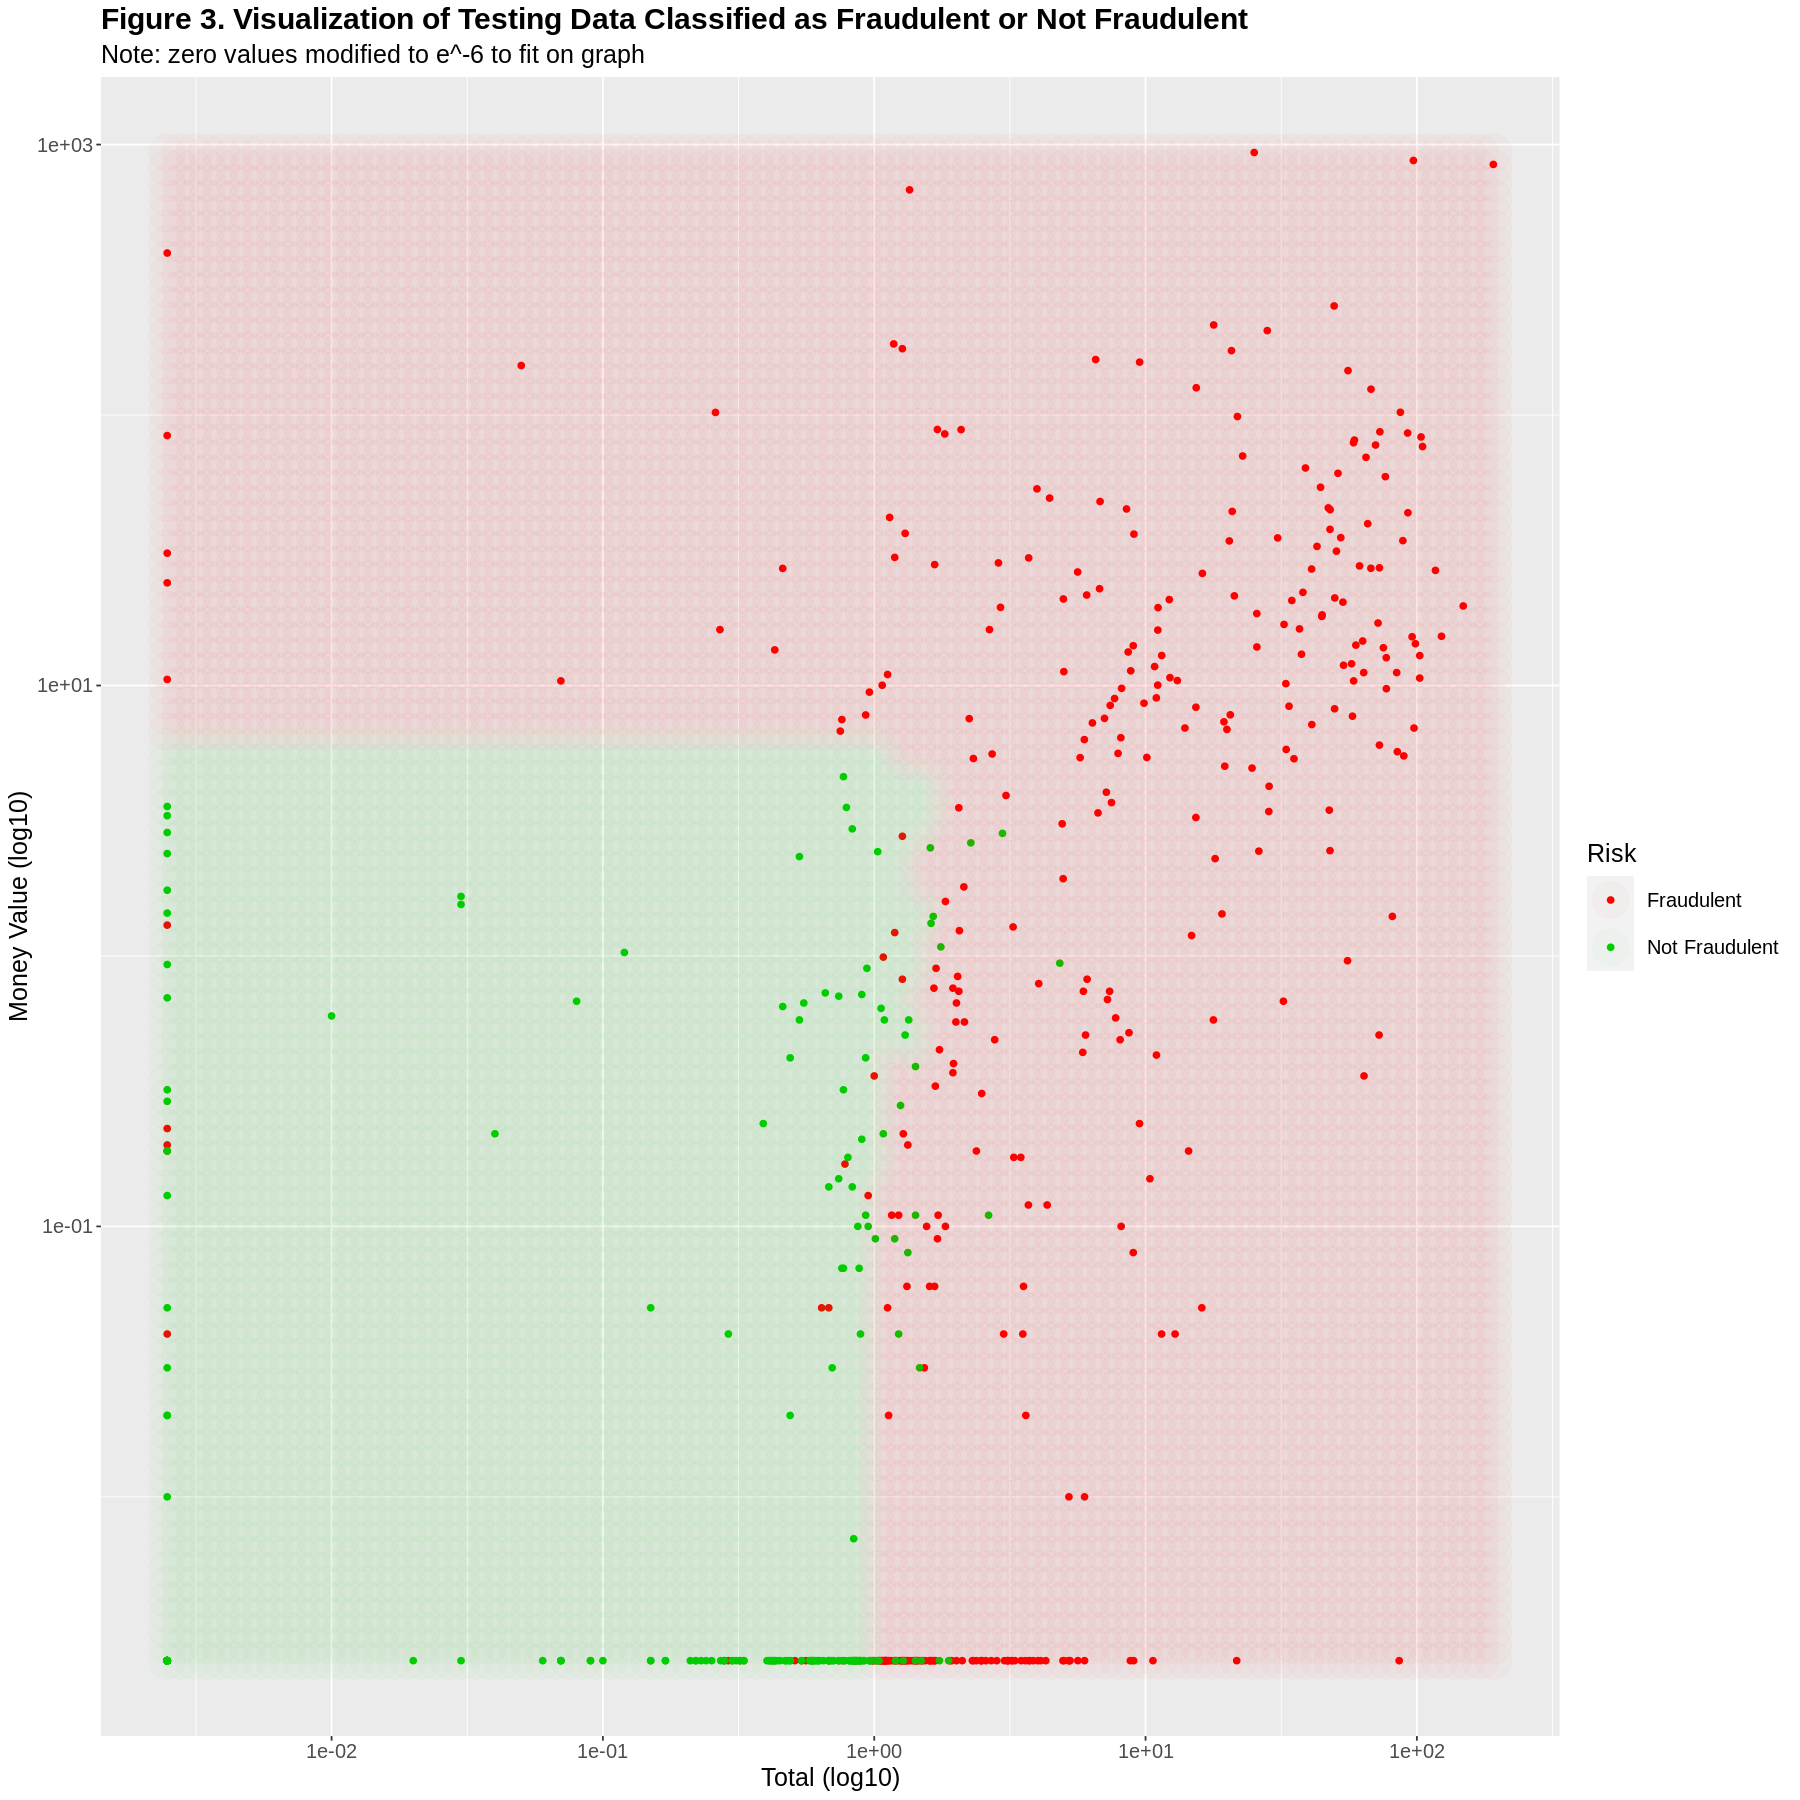

In [17]:
# Visualizing a coloured prediction map

# Create the grid of synthetic new observations
options(repr.plot.width = 15, repr.plot.height = 15)

# Slightly modify audit_train_select to change zero values to a very small non-zero number (order still maintained)
#     which allows the zero values in the data to be a part of the coloured region of the decision boundary graph
# Code sourced from https://www.geeksforgeeks.org/how-to-replace-particular-value-in-r-dataframe/
audit_train_select_modified <- audit_train_select
audit_train_select_modified[audit_train_select_modified == 0] <- exp(-6)

    

# Grid for total
# Code for log-scale grids from https://stackoverflow.com/questions/23901907/create-a-log-sequence-across-multiple-orders-of-magnitude
total_grid <- exp(seq(-6,
                      log(max(audit_train_select$total)),
                      length.out = 100))


# Grid for money value
mv_grid <- exp(seq(-6,
                    log(max(audit_train_select$money_value)),
                    length.out = 100))


# Combine the two grids
combined_grid <- as_tibble(expand.grid(total = total_grid,
                                       money_value = mv_grid))

# Make predictions with best fit 
prediction_grid <- predict(best_audit_fit, combined_grid) 

prediction_table <- bind_cols(prediction_grid, combined_grid) %>%
    rename(risk = .pred_class)

# Creating the plot
colored_audit_plot <- ggplot() +
    geom_point(data = audit_train_select_modified, 
               mapping = aes(x = total, y = money_value, color = risk),
               alpha = 1) +
    geom_point(data = prediction_table, 
                mapping = aes(x = total, y = money_value, color = risk),
                alpha = 0.02,
                size = 10) +
    labs(x = "Total (log10)",
         y = "Money Value (log10)",
         color = "Risk") +
    scale_color_manual(labels = c("Fraudulent", "Not Fraudulent"),
                       values = c("red", "green3")) +
    scale_x_continuous(trans = 'log10') +
    scale_y_continuous(trans = 'log10') +
    ggtitle("Figure 3. Visualization of Testing Data Classified as Fraudulent or Not Fraudulent",
           subtitle = "Note: zero values modified to e^-6 to fit on graph") +
    theme(text = element_text(size = 15), plot.title = element_text(face = "bold")) 

colored_audit_plot

Figure 3 demonstrates the classification of firms in the training data set. Firms with higher amounts of money involved in misstatements in past audits ("money value") and/or total discrepancy in past reports ("total") are classified as fraudulent. A few firms were classified incorrectly, particularly when the values of money value and total were small, and/or near the decision boundary between fraudulent and non-fraudulent.

In [12]:
# calculating accuracy of predictions
audit_metrics <- audit_predictions %>%
    metrics(truth = risk, estimate = .pred_class)
audit_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8512821
kap,binary,0.6833884


**Table 6.** Accuracy estimate from knn-classification using 11 neighbors. The classification model was able to classify firms in the testing data set with approximately 85% accuracy.

In [13]:
# creating the truth matrix
audit_matrix <- audit_predictions %>%
    conf_mat(truth = risk, estimate = .pred_class)
audit_matrix

          Truth
Prediction   F   N
         F 107  14
         N  15  59

**Table 7.** Confusion matrix showing correct and incorrect classification of the training data. There are roughly equal numbers of false positive and false negative assignments.

## Discussion

Discussion:

* summarize what you found
* discuss whether this is what you expected to find?
* discuss what impact could such findings have?
* discuss what future questions could this lead to?

We found that, using a KNN classification model, the two variables "total" (which represents the total amount of discrepancy involved in other reports) and "money_value" (which represents the total value of money involved in misstatements in past audits) have an accuracy of approximately 85% in predicting whether a firm is involved in fraudulent activity. We can see from the confusion matrix in table 7 that only 15/195 firms are actually fraudulent but are not caught by the algorithm. This means that only approximately 7.7% of true fraudulent firms are actually evading the algorithm. Compared to the results published by Hooda et al. using the same data set, our model had a lower prediction accuracy of 85% compared to the 93% reported by Hooda et al. Lower prediction accuracy was expected as our knn-classification model is simpler and uses fewer predictors than the decision tree, random forest and other models used by Hooda et al (2018). Addition of other predictor variables to the knn-classification model may yield better prediction accuracy with the downside of making the results more difficult to interpret and visualize.

While the predictions provided by our model may not be accurate enough to charge a company with fraud, they may give auditors leads on which firms warrant further investigation for fraud. We consider this to be an acceptable result, given that a false positive (\~8% of predictions) or false negative (\~7% of predictions) would not be very detrimental. In the case of a false positive, a further in-depth audit would show that the firm is innocent and has not committed any fraud. The consequences of this would be dragging firms through long audit processes and wasting auditing resources on unnecessary audits. In figure 3, we can see that there are many firms that are falsely classified as safe because they have either low "money_value" or low "total". These false predictions go to show the importance of considering the context of the data, which cannot be done with our KKN algorithm. False negative results are also more concerning since a few fraudulent firms may slip through without consequences and continue to harm people by commiting fraud. However, an 85% accuracy rate in detecting fraudulent firms could act in itself as a deterrent to fraudulent activity. 

Any government or auditing agency implementing such a fraud prediction model would need to consider whether the cost and time savings of predicting fraudulent activity with the given level of accuracy outweigh the costs of unnecessarily auditing non-fraudulent firms and letting a few fraudulent firms slip through. A major benefit of a machine learning approach to financial audits is that a vast number of firms can be screened very quickly, so that more in depth auditing can be conducted on firms that have higher fraud risk. The classification model provides a good way to point auditors at firms where more resources or time and review are needed to catch potential fraud. The algorithm is also great for cases where audits are used to determine if the correct taxes are being paid. In these cases, a firm that is falsely classified as being fraudulent is not too big of a deal since the results will not be made public without in depth review by tax agencies first, therefore, the reputation of the firm will not be unjustly damaged. Since only roughly 7.7% of fraudulent firms manage to fool the algorithm, cases where audits are conducted to verify that the correct amount of taxes are being paid, the KNN algorithm becomes an efficient and accurate way to highlight firms where more in depth evaluation should be conducted. Without computational approaches like these, auditors will be tasked with much more work and not divide their time and resources in the best places, therefore, missing potential high risk firms and unnecessarily auditing low risk firms (Abbott et al., 2022). For this reason, any computational tool that allows auditors to screen and target suspicious companies across the entire business sector will be a valuable asset in making the auditing process much more efficient. 

The current data is used by the Indian government to audit firms in India, but the findings from this report can be applied to other countries and their governments as well. These findings can be used as a starting point to build a model that works best for a country's unique circumstances and can be adapted as needed.

Some further questions that this could lead to are: 

* Can we use this model for other countries outside of India? How does India differ from other countries in terms of the factors that are highly correlated with fraudulent activities?

* Can false positive and false negative predictions be further classified to reduce the number of false results? This may require using additional predictor variables to distinguish small differences in the behaviour of firms.

## References

References:

* At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references)
* Make sure to cite the source of your data as well.



Abbott, L. J., Boland, C., Buslepp, W., & McCarthy, S. (2022). U.S. audit partner identification and auditor reporting. Journal of Accounting and Public Policy, 41(1), 106862. https://doi.org/10.1016/j.jaccpubpol.2021.106862

Ashar, J. (2022, June 29). What is the cost to do an audit? and how much time does it take to complete an audit? Accountancy Age. Retrieved December 6, 2022, from https://www.accountancyage.com/2019/11/13/what-is-the-cost-to-do-an-audit-and-how-much-time-does-it-take-to-complete-an-audit/ 

Godick, G. (2022, October 7). When is the right time for your company to get an audit? Outsourced CFO Services. Retrieved December 6, 2022, from https://www.gsquaredcfo.com/blog/when-to-get-an-audit#:~:text=An%20investor%20or%20bank%20requires,re%20thinking%20about%20selling%20the 

Hooda, N., Bawa, S., & Rana, P. S. (2018). Fraudulent firm classification: A case study of an external audit. Applied Artificial Intelligence, 32(1), 48-64. https://doi.org/10.1080/08839514.2018.1451032

Keng, C. (2018, May 31). How much do financial audits cost? At least $10,000 dollars. Forbes. Retrieved December 6, 2022, from https://www.forbes.com/sites/cameronkeng/2018/05/31/how-much-do-financial-audits-cost-at-least-10000-dollars/?sh=610a49404262 

